<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualizing-agent-trajectory" data-toc-modified-id="Visualizing-agent-trajectory-1">Visualizing agent trajectory</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.2">Visualization</a></span></li><li><span><a href="#Initial-visualizations" data-toc-modified-id="Initial-visualizations-1.3">Initial visualizations</a></span></li><li><span><a href="#More-precise-tests" data-toc-modified-id="More-precise-tests-1.4">More precise tests</a></span></li></ul></li></ul></div>

# Visualizing agent trajectory

## Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.plot()
plt.close('all')
plt.rcParams["figure.figsize"] = (6, 6)  
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

## Visualization

https://github.com/beyretb/AnimalAI-Olympics/issues/77

> It is the z (forward) component of the agent's velocity in its local reference frame.

z seems to be the forward direction of the agent, x lateral and y is related to height.

So I have to take orientation of the agent into account to be able to map the agent position. A complete rotation takes 60 steps, and it does not seem to use inertia. So each time the agent rotates it does 6º turn.

In [3]:
def visualize_gameplay(filepath):
    data = np.load(filepath)
    #_plot_speed_profile(data)
    positions = _track_agent_position(data)
    print(np.max(positions, axis=0))
    plt.scatter(positions[:, 0], positions[:, 1], c=np.linspace(0, 1, len(positions)))
    
def _plot_speed_profile(data):
    plt.figure()
    plt.plot(data['speed'][:, 0, 0], label='x')
    plt.plot(data['speed'][:, 0, 1], label='y')
    plt.plot(data['speed'][:, 0, 2], label='z')
    plt.title('Speed profiles')
    plt.legend(loc=0)
    
def _track_agent_position(data):
    orientation = 0
    position = np.zeros(2)
    positions = [position]
    speeds = data['speed'][:, 0, [0, 2]]/10/1.625
    rotations = data['previous_action'][:, 0, 1]
    for speed, rotation in zip(speeds, rotations):
        if rotation == 1:
            orientation += 6
        elif rotation == 2:
            orientation -= 6
        position[0] += np.sum(speed*np.array([np.cos(orientation*np.pi/180), np.sin(orientation*np.pi/180)]))
        position[1] += np.sum(speed*np.array([np.sin(orientation*np.pi/180), np.cos(orientation*np.pi/180)]))
        positions.append(position.copy())
    return np.array(positions)

## Initial visualizations

[27.75200682 19.24296368]


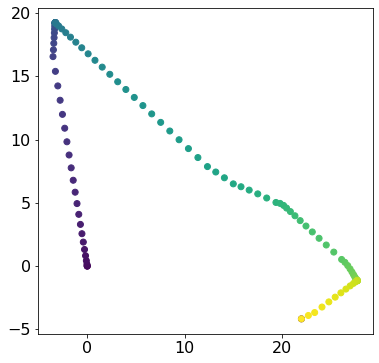

In [4]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/4multi/00000.npz')

[23.37371529  7.69415385]


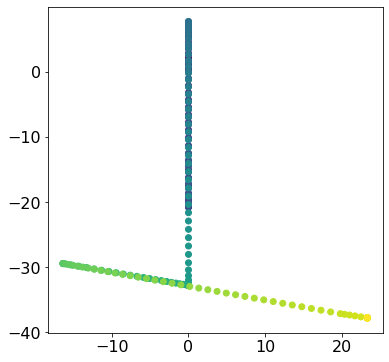

In [5]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/4multi/00001.npz')

[10.35710709 17.13547333]


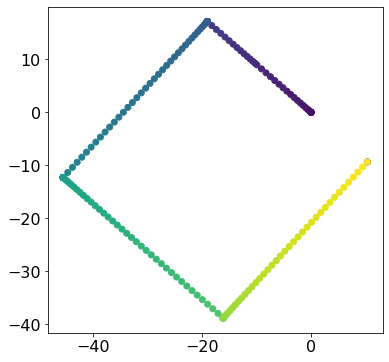

In [6]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/4multi/00002.npz') # this should be a square

[43.97015002 22.81682009]


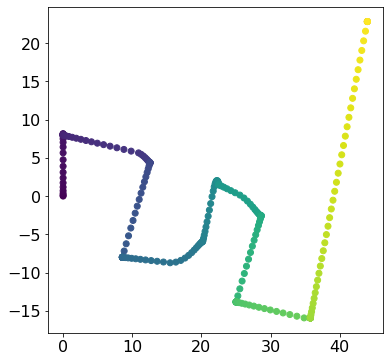

In [7]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/4multi/00003.npz') # zig zag and move to the other side

It's not perfect but it's a good beginning. I have to think how to do more precise experiments and how to test that it works correctly.

## More precise tests

[39.60738462 39.95753846]


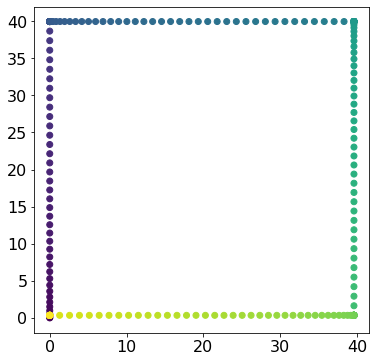

In [8]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00000.npz') # square

[28.42449776 55.52246154]


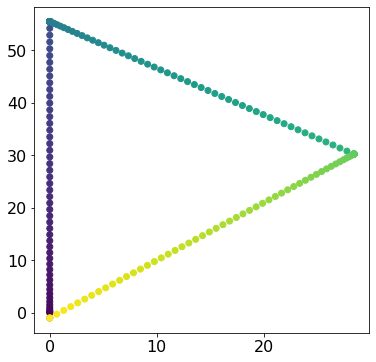

In [11]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00001.npz') # triangle starting at rotation 45

[36.3179177  39.95753846]


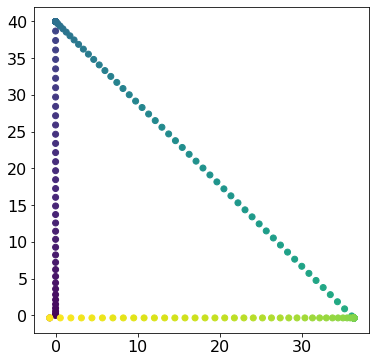

In [12]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00002.npz') # triangle starting at rotation 0

[20.25717105  9.3855833 ]


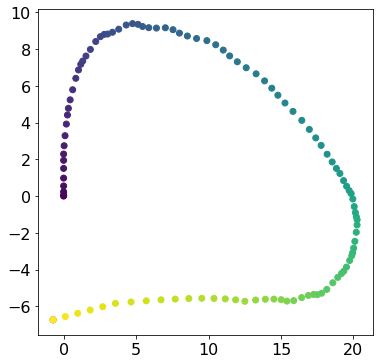

In [13]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00003.npz') # go around the arena and back to the initial point

[ 1.04537103 15.026585  ]


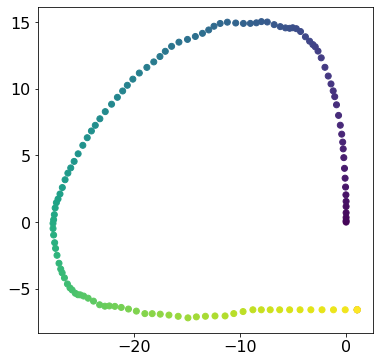

In [14]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00004.npz') # go around the arena and back to the initial point going in other direction